<a href="https://colab.research.google.com/github/Ravneet7878/Customer-Churn-Predition/blob/main/CUSTOMER_CHURN_PREDICTION_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score
plt.style.use("seaborn")
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("Churn_Modelling.csv")

In [ ]:
df_numeric = df.select_dtypes(include = [np.number])

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0





*   CustomerId : Unique Id of each customer.
*   Surname : The surname of the customer.
*   CreditScore : The credit score of the customer.
*   Geography : The country customer belongs to (Germany/France/Spain).
*   Gender : The gender of the customer (Male/Female).
*   Age : The age of the customer.
*   Tenure : The customer's number of years in the bank.
*   Balance : The balance of the customer's account.
*   NumOfProducts : The number of bank products that the customer uses.
*   HasCrCard : Does the customer owns a card? (1 = Yes, 0 = No).
*   IsActiveMember : Does the customer has an active membership? (1 = Yes, 0 = No).
*   EstimatedSalary : The estimated salary of the customer.
*   Exited : Churned or not? (1 = Yes, 0 = No).












In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
df.describe() # Tells About The Statistical Properties Of The Dataset.

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000











**EXPLORATORY DATA ANALYSIS**




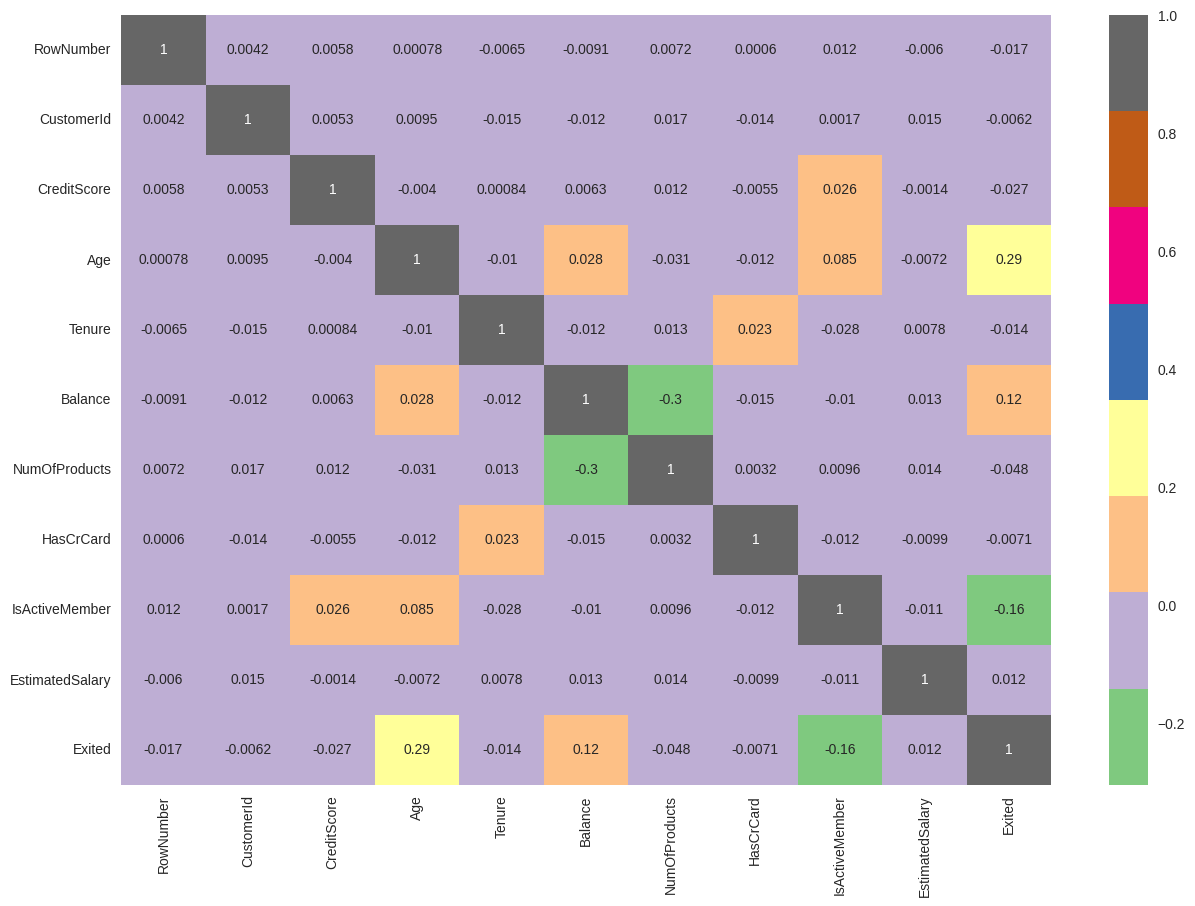

In [ ]:
plt.figure(figsize = (15, 10))
corr = df_numeric.corr()  # Compute Correlation For Numeric Columns Only.
sns.heatmap(corr, annot = True, cmap = "Accent")
plt.show()

In [ ]:
features = corr["Exited"].sort_values(ascending = False)[1 : ]

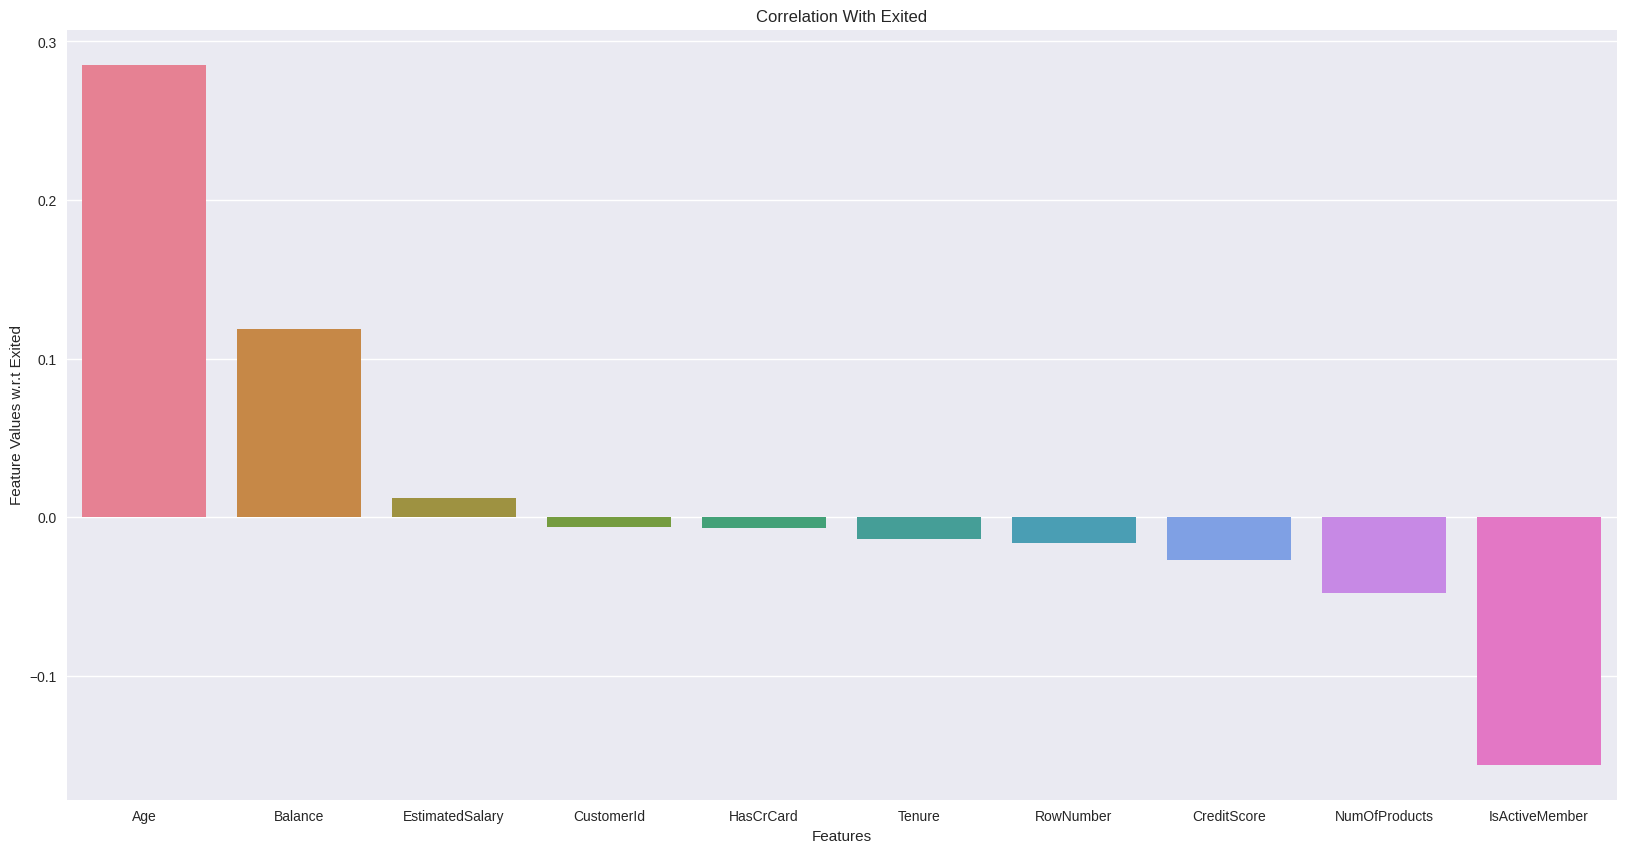

In [ ]:
plt.figure(figsize = (20, 10))
colors = sns.color_palette("husl", len(features))
sns.barplot(x = features.index, y = features.values, palette = colors)
plt.xlabel("Features")
plt.ylabel("Feature Values w.r.t Exited")
plt.title("Correlation With Exited")
plt.show()

**DATA VISUALIZATION**

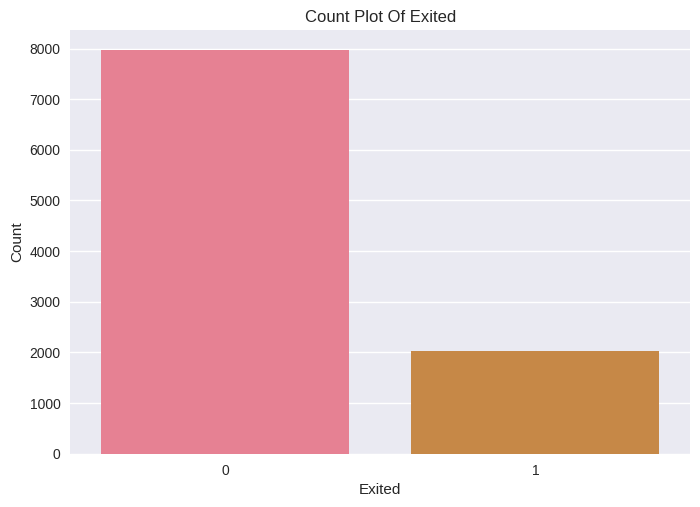

In [ ]:
colors = sns.color_palette("husl", len(features))
sns.countplot(x = "Exited", data = df, palette = colors)
plt.xlabel("Exited")
plt.ylabel("Count")
plt.title("Count Plot Of Exited")
plt.show()

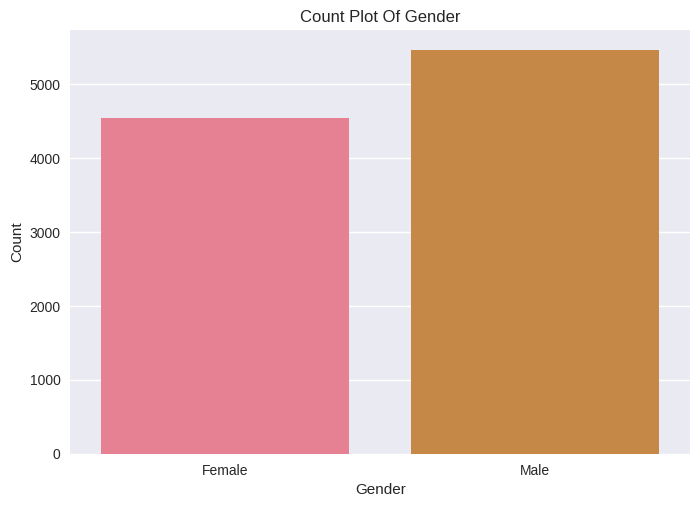

In [ ]:
colors = sns.color_palette("husl", len(features))
sns.countplot(x = "Gender", data = df, palette = colors)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Count Plot Of Gender")
plt.show()

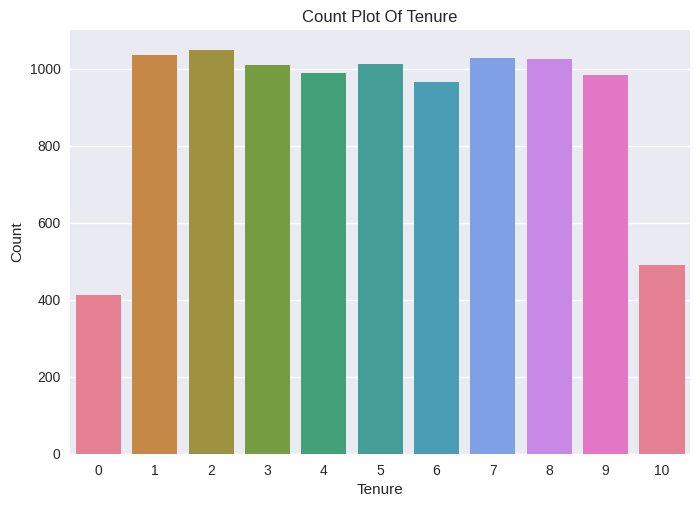

In [ ]:
colors = sns.color_palette("husl", len(features))
sns.countplot(x = "Tenure", data = df, palette = colors)
plt.xlabel("Tenure")
plt.ylabel("Count")
plt.title("Count Plot Of Tenure")
plt.show()

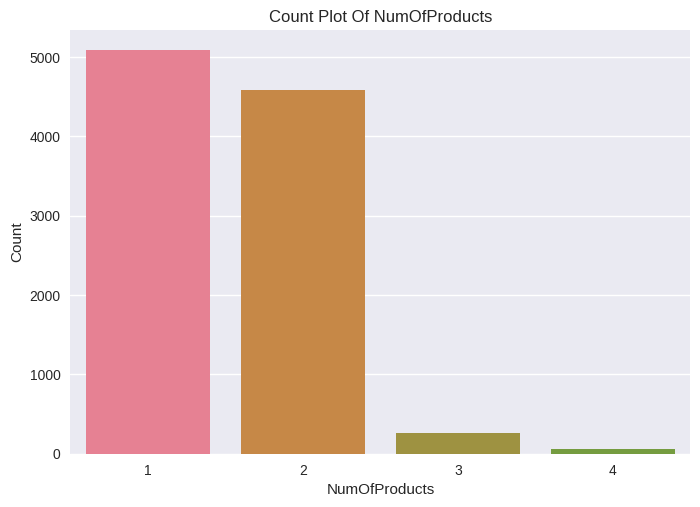

In [ ]:
colors = sns.color_palette("husl", len(features))
sns.countplot(x = "NumOfProducts", data = df, palette = colors)
plt.xlabel("NumOfProducts")
plt.ylabel("Count")
plt.title("Count Plot Of NumOfProducts")
plt.show()

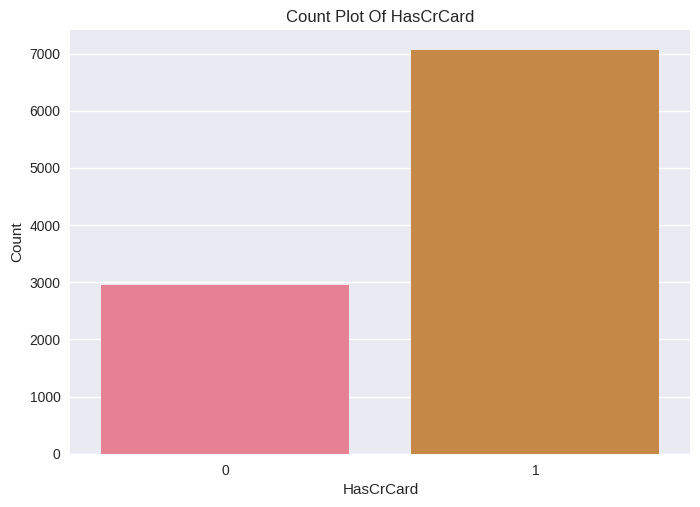

In [ ]:
colors = sns.color_palette("husl", len(features))
sns.countplot(x = "HasCrCard", data = df, palette = colors)
plt.xlabel("HasCrCard")
plt.ylabel("Count")
plt.title("Count Plot Of HasCrCard")
plt.show()

**FINDING RELATIONS**

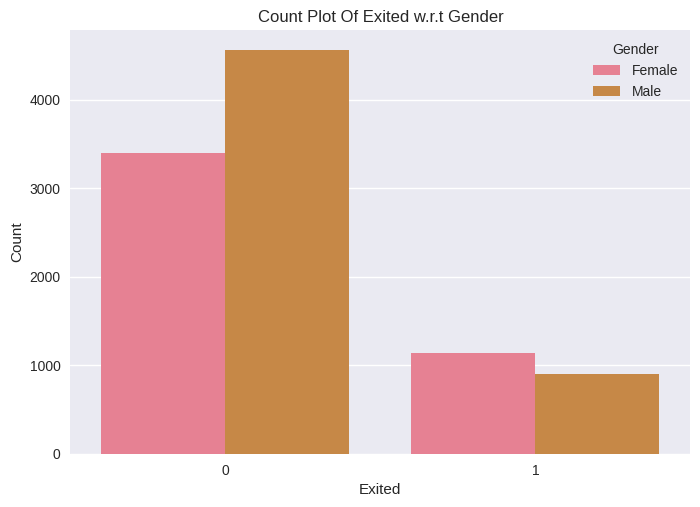

In [ ]:
colors = sns.color_palette("husl", len(features))
sns.countplot(x = "Exited", data = df, palette = colors, hue = "Gender")
plt.xlabel("Exited")
plt.ylabel("Count")
plt.title("Count Plot Of Exited w.r.t Gender")
plt.show()

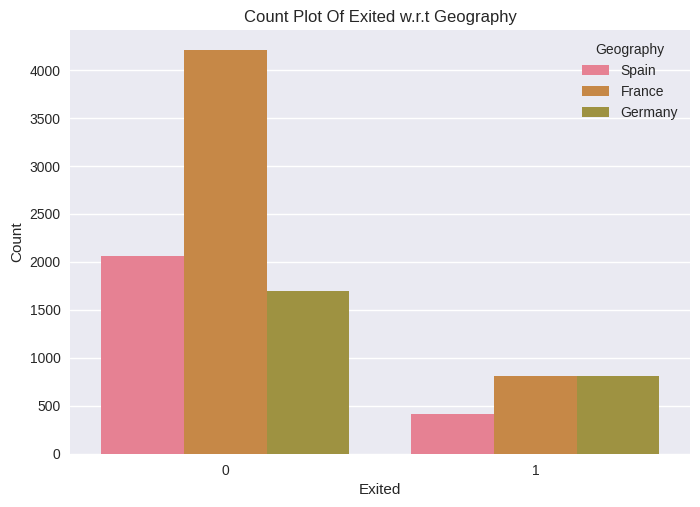

In [ ]:
colors = sns.color_palette("husl", len(features))
sns.countplot(x = "Exited", data = df, palette = colors, hue = "Geography")
plt.xlabel("Exited")
plt.ylabel("Count")
plt.title("Count Plot Of Exited w.r.t Geography")
plt.show()

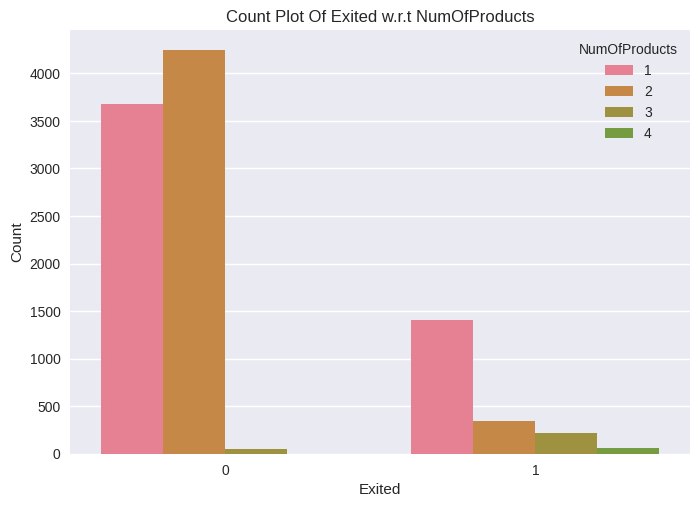

In [ ]:
colors = sns.color_palette("husl", len(features))
sns.countplot(x = "Exited", data = df, palette = colors, hue = "NumOfProducts")
plt.xlabel("Exited")
plt.ylabel("Count")
plt.title("Count Plot Of Exited w.r.t NumOfProducts")
plt.show()

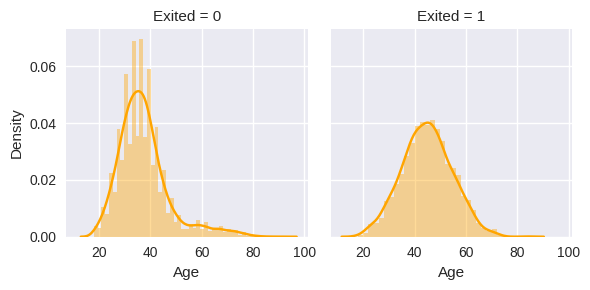

In [ ]:
sns.FacetGrid(df, col = "Exited").map(sns.distplot, "Age", color = "orange")
plt.show()

**DATA PREPROCESSING**

In [ ]:
df.drop(columns = ["CustomerId", "Surname", "RowNumber"], inplace = True)

In [ ]:
df["Geography"] = df["Geography"].astype("category").cat.codes
df["Gender"] = df["Gender"].map({"Female": 0, "Male": 1})

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
X = df.drop(columns = ["Exited"]).values
y = df["Exited"].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

**MODEL BUILDING**

In [ ]:
basic_model = XGBClassifier()

In [ ]:
basic_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    print("Training Accuracy : ", model.score(X_train, y_train))
    print("\nTesting Accuracy : ", model.score(X_test, y_test))

    y_pred = model.predict(X_test)

    print("\nConfusion Matrix : \n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report : \n", classification_report(y_test, y_pred))
    print("\nF1 Score : ", f1_score(y_test, y_pred))

In [ ]:
evaluate_model(basic_model, X_train, X_test, y_train, y_test)

Training Accuracy :  0.955375

Testing Accuracy :  0.861

Confusion Matrix : 
 [[1523   84]
 [ 194  199]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.70      0.51      0.59       393

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000


F1 Score :  0.5887573964497042


**HYPERPARAMETER TUNING**

In [ ]:
xgb_parameters = {
    "n_estimators" : [100, 200],
    "max_depth" : [4, 5]
}

In [ ]:
grid = GridSearchCV(XGBClassifier(), param_grid = xgb_parameters, scoring = "accuracy", cv = 10)

In [ ]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'max_depth': [4, 5], 'n_estimators': [100, 200]},
             scoring='accuracy')

In [ ]:
print("Best Score : ", grid.best_score_)
print("Best Parameters : ", grid.best_params_)

Best Score :  0.8571249999999999
Best Parameters :  {'max_depth': 4, 'n_estimators': 100}


In [ ]:
model_1 = XGBClassifier(n_estimators = 100, max_depth = 4)

In [ ]:
model_1.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
evaluate_model(model_1, X_train, X_test, y_train, y_test)

Training Accuracy :  0.905125

Testing Accuracy :  0.8655

Confusion Matrix : 
 [[1532   75]
 [ 194  199]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.73      0.51      0.60       393

    accuracy                           0.87      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000


F1 Score :  0.5967016491754122


In [ ]:
model_2 = GradientBoostingClassifier(n_estimators = 1500)

In [ ]:
model_2.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=1500)

In [ ]:
evaluate_model(model_2, X_train, X_test, y_train, y_test)

Training Accuracy :  0.957875

Testing Accuracy :  0.863

Confusion Matrix : 
 [[1521   86]
 [ 188  205]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.70      0.52      0.60       393

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000


F1 Score :  0.5994152046783626
